In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Membaca dataset
df = pd.read_csv("C:/KULIAH/SEMESTER4/Penambangan_Data_Dan_Analisis/Titanic-Dataset.csv", engine='python')


In [47]:
total_penumpang = len(df)
print("Jumlah total penumpang:", total_penumpang)


Jumlah total penumpang: 891


Jumlah penumpang selamat dan tidak selamat:
 Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9884\2755213582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


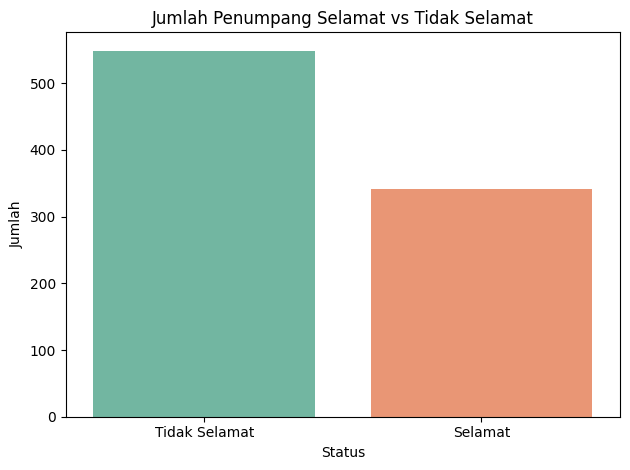

In [48]:
survival_counts = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
print("Jumlah penumpang selamat dan tidak selamat:\n", survival_counts)

# Visualisasi
sns.countplot(data=df, x='Survived', palette='Set2')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


In [49]:
print("Rata-rata umur penumpang:", df['Age'].mean().round (2))
print("Umur termuda:", df['Age'].min())
print("Umur tertua:", df['Age'].max())

# nama penumpang termuda dan tertua
print("Penumpang termuda:")
print(df[df['Age'] == df['Age'].min()][['Name', 'Age']])

print("Penumpang tertua:")
print(df[df['Age'] == df['Age'].max()][['Name', 'Age']])


Rata-rata umur penumpang: 29.7
Umur termuda: 0.42
Umur tertua: 80.0
Penumpang termuda:
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42
Penumpang tertua:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


Jumlah penumpang berdasarkan jenis kelamin:
 Sex
male      577
female    314
Name: count, dtype: int64

Penumpang laki-laki lebih banyak.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9884\2567042645.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


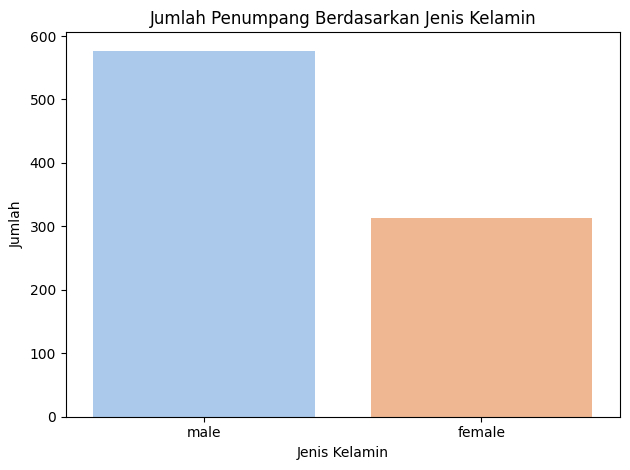

In [50]:
jumlah_gender = df['Sex'].value_counts()
print("Jumlah penumpang berdasarkan jenis kelamin:\n", jumlah_gender)

if jumlah_gender['male'] > jumlah_gender['female']:
    print("\nPenumpang laki-laki lebih banyak.")
else:
    print("\nPenumpang perempuan lebih banyak.")

# Visualisasi
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


Kelas 1: 216 penumpang (24.24%)
Kelas 2: 184 penumpang (20.65%)
Kelas 3: 491 penumpang (55.11%)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9884\2344358215.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set3')


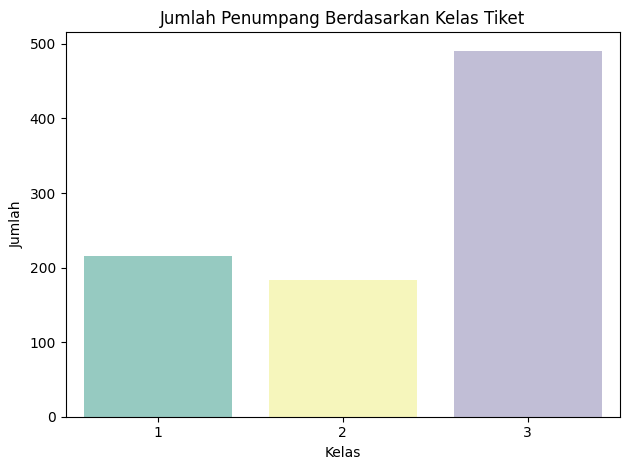

In [52]:
jumlah_kelas = df['Pclass'].value_counts().sort_index()
persentase_kelas = (jumlah_kelas / len(df) * 100).round(2)

#Menampilkan jumlah dan persentase
for kelas in jumlah_kelas.index:
    print(f"Kelas {kelas}: {jumlah_kelas[kelas]} penumpang ({persentase_kelas[kelas]}%)")

# Visualisasi
sns.countplot(data=df, x='Pclass', palette='Set3')
plt.title('Jumlah Penumpang Berdasarkan Kelas Tiket')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


In [53]:
# Cek apakah ada missing value di seluruh kolom
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# menyalin ulang data frame asli untuk prosesing
df_clean = df.copy()

# menghapus kolom cabin
if 'Cabin' in df_clean.columns:
    df_clean.drop(columns=['Cabin'], inplace=True)

# menggunakan imputasi median 
if df_clean['Age'].isnull().sum() > 0:
    df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

# menggunakan impuatsi modus
if df_clean['Embarked'].isnull().sum() > 0:
    df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

df_clean.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9884\4178952945.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9884\4178952945.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
# Deteksi outlier menggunakan metode IQR (Interquartile Range)
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

outlier_info = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Deteksi outlier
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    if not outliers.empty:
        outlier_info[col] = {
            'jumlah_outlier': len(outliers),
            'persentase': round(len(outliers) / len(df_clean) * 100, 2)
        }

# Tampilkan hasil deteksi outlier
outlier_info


{'Age': {'jumlah_outlier': 66, 'persentase': 7.41},
 'SibSp': {'jumlah_outlier': 46, 'persentase': 5.16},
 'Parch': {'jumlah_outlier': 213, 'persentase': 23.91},
 'Fare': {'jumlah_outlier': 116, 'persentase': 13.02}}

outlier adalah data yang jauh dari nilai mayoritas, biasanya berada di luar batas atas dan batas bawah

In [60]:
# Salin data hasil preprocessing sebelumnya
df_outlier_handled = df_clean.copy()

# Terapkan log transform (+1 untuk menghindari log(0))
df_outlier_handled['Fare_log'] = np.log1p(df_outlier_handled['Fare'])
df_outlier_handled['SibSp_log'] = np.log1p(df_outlier_handled['SibSp'])
df_outlier_handled['Parch_log'] = np.log1p(df_outlier_handled['Parch'])

# Tampilkan 5 data teratas untuk memastikan transformasi berhasil
df_outlier_handled[['Fare', 'Fare_log', 'SibSp', 'SibSp_log', 'Parch', 'Parch_log']].head()


,Fare,Fare_log,SibSp,SibSp_log,Parch,Parch_log
0,7.2500,2.110213,1,0.693147,0,0.0
1,71.2833,4.280593,1,0.693147,0,0.0
2,7.9250,2.188856,0,0.000000,0,0.0
3,53.1000,3.990834,1,0.693147,0,0.0
4,8.0500,2.202765,0,0.000000,0,0.0


menggunakan transformasi log untuk mengurangi outlier serta menormalkan distribusi data numerik yang sangat miring

In [68]:
df_scaled = df_outlier_handled.copy()

# Kolom yang akan discaling
features_to_scale = ['Age', 'Fare_log', 'SibSp_log', 'Parch_log']

# Buat objek scaler dan fit-transform datanya
scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Tampilkan statistik deskriptif setelah scaling
df_scaled[features_to_scale].describe()


,Age,Fare_log,SibSp_log,Parch_log
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,-1.938841e-16,3.987333e-18,4.585433e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-3.058578e+00,-6.092795e-01,-5.290604e-01
25%,-5.657365e-01,-8.002318e-01,-6.092795e-01,-5.290604e-01
50%,-1.046374e-01,-2.316613e-01,-6.092795e-01,-5.290604e-01
75%,4.333115e-01,5.198636e-01,8.891640e-01,-5.290604e-01
max,3.891554e+00,3.385294e+00,4.140674e+00,4.200343e+00


In [70]:
# Ambil kolom fitur yang ingin digunakan
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare_log', 'SibSp_log', 'Parch_log', 'Embarked']
X = df_scaled[feature_cols]

# Encode fitur kategorikal ('Sex', 'Embarked') jadi angka
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Target: kolom 'Survived'
y = df_scaled['Survived']

# Split data 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek bentuk data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

training set ini untuk melatih model
testing set ini untuk mengukur performa odel terhadap data baru
kita membagi 2 bagian  yaitu rasio 80:20
alasannya karna 
1. 80% sudah cukup untuk melatih model
2. 20% sudah cukup untuk menguji akurasi
3. dengan membagi seperti itu sudah seimbang untuk generalisasi dan pelatihan
4. pembagian segitu adalah pembagian yang wajar untuk mengolah data

In [82]:
# 1. Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [75]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Evaluasi model satu per satu
logreg_eval = evaluate_model(logreg_model, X_test, y_test)
knn_eval = evaluate_model(knn_model, X_test, y_test)
dt_eval = evaluate_model(dt_model, X_test, y_test)

# Gabungkan hasil evaluasi ke DataFrame
import pandas as pd
eval_df = pd.DataFrame({
    'Logistic Regression': logreg_eval,
    'KNN': knn_eval,
    'Decision Tree': dt_eval
})

# Tampilkan hasil evaluasi
eval_df.T.round(3)


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.793,0.753,0.743,0.748
KNN,0.810,0.786,0.743,0.764
Decision Tree,0.788,0.743,0.743,0.743


KNN adalah algoritma yang mengklasifikasikan data berdasarkan "tetangga terdekatnya". Artinya, untuk menentukan suatu data masuk kelas apa, KNN melihat k tetangga terdekat di sekitarnya, lalu mengambil suara terbanyak

cara kerjanya yaitu:
1. Hitung jarak antara data baru dan semua data di training set (biasanya pakai Euclidean Distance).
2. Ambil k data terdekat (misalnya k=5).
3. Lihat kelas mayoritas dari k tetangga itu.
4. Prediksi berdasarkan mayoritas tersebut.

kelebihannya yaitu:
1. algorita ini sederhana dan mudah dimengerti

kekurangannya yaitu:
1. lambat kalau datanya besar jadi harus itung satu persatu
2. sensitif terhadap skala data seperti harus di scalling dulu

Decision Tree membuat pohon keputusan, seperti pohon logika. Algoritma ini membagi data berdasarkan fitur yang paling baik memisahkan kelas.

cara kerjanya yaitu:
1. Pilih fitur terbaik untuk membagi data
2. Buat cabang dari fitur itu.
3. Ulangi proses untuk setiap cabang hingga semua data terklasifikasi atau batas pohon tercapai.

kelebihannya yaitu:
1. mudah dipahami dan gampang divisualisasikan
2. bisa menangani data kategorikal dan data numerik

kekurangannya yaitu:
1. rentan overfitting kalua pohon terlalu dalam
2. perlu disesuaikan  biar ga terlalu kompleks

regression adalah algoritma klasifikasi. Logistic Regression memprediksi probabilitas suatu data masuk ke kelas tertentu

cara kerjanya yaitu:
1. Hitung kombinasi linear dari fitur
2. Ubah hasil z menjadi probabilitas dengan fungsi sigmoid
3. Jika probabilitas > 0.5 → klasifikasi = 1 , kalau tidak = 0.

kelebihan:
1. ringan dan cepat dilatih
2. bagus untuk data yang linear

kekurangan:
1. tidak cocok kalau hubungan antar fitiir dan target sangat kompleks
2. butuh asumsi bahwa fitur tidak berkorelasi kuat satu sama lain

In [77]:
# Menghitung nilai prediksi dari masing-masing model
logreg_pred = logreg_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Membuat confusion matrix untuk ketiga model
logreg_cm = confusion_matrix(y_test, logreg_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

logreg_cm, knn_cm, dt_cm

(array([[87, 18],
        [19, 55]]),
 array([[90, 15],
        [19, 55]]),
 array([[86, 19],
        [19, 55]]))

1. Logistic Regression
87 orang yang sebenarnya tidak selamat, diprediksi tidak selamat
18 orang yang sebenarnya tidak selamat, diprediksi selamat 
19 orang yang sebenarnya selamat, diprediksi tidak selamat 
55 orang yang sebenarnya selamat, diprediksi selamat 

2. K-Nearest Neighbors (KNN)
90 orang tidak selamat, diprediksi tidak selamat 
15 orang tidak selamat, diprediksi selamat 
19 orang selamat, diprediksi tidak selamat 
55 orang selamat, diprediksi selamat
3. 90 orang tidak selamat, diprediksi tidak selamat 
15 orang tidak selamat, diprediksi selamat 
19 orang selamat, diprediksi tidak selamat
55 orang selamat, diprediksi selamat 

KNN adalah model terbaik dalam kasus ini karena memberikan prediksi yang paling akurat dan stabil, serta sangat cocok untuk data seperti Titanic yang memiliki pola klasifikasi yang jelas dan rapi

In [81]:
from sklearn.metrics import classification_report

# Cetak classification report untuk model KNN
print(classification_report(y_test, knn_model.predict(X_test), target_names=['Tidak Selamat', 'Selamat']))



               precision    recall  f1-score   support

Tidak Selamat       0.83      0.86      0.84       105
      Selamat       0.79      0.74      0.76        74

     accuracy                           0.81       179
    macro avg       0.81      0.80      0.80       179
 weighted avg       0.81      0.81      0.81       179



In [83]:
# Buat prediksi dengan model KNN
knn_pred = knn_model.predict(X_test)

# Total penumpang yang DIPREDIKSI selamat (label 1)
jumlah_prediksi_selamat = sum(knn_pred)

# Bandingkan dengan data asli, hitung berapa yang benar-benar selamat dari prediksi itu
benar_selamat = sum((knn_pred == 1) & (y_test == 1))

print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah yang benar-benar selamat dari prediksi tersebut: {benar_selamat}")


Jumlah penumpang yang diprediksi selamat: 70
Jumlah yang benar-benar selamat dari prediksi tersebut: 55
